In [1]:
%load_ext autoreload
%autoreload 2

import analysis
import lmpsetup
import hmdsetup

import numpy as np
import matplotlib.pyplot as plt
import analysis

import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda

In [3]:
T=3
pdWT = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/0.8/WT')
z, rho_z, og_rho = pdWT.density_profile(T=T, noise=False)

> Run Completed at 100.00% for CPEB4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations


Text(0.5, 0, 'z ($\\AA$)')

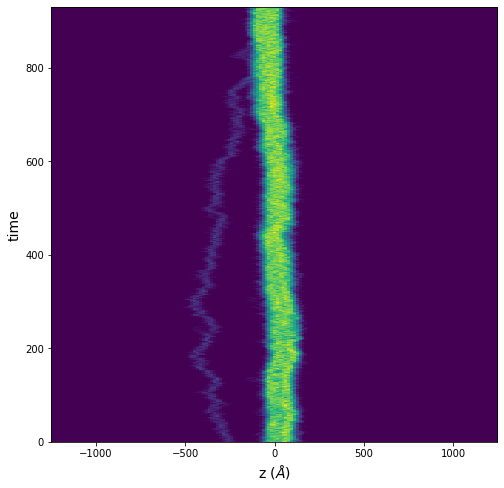

In [21]:
fig, ax = plt.subplots(figsize=(8,8))
# fig, ax = plt.subplots()
ax.imshow(og_rho, aspect='auto', extent=[z.min(), z.max(),  og_rho.shape[0], 0])
ax.invert_yaxis()
ax.set_ylabel("time",  fontsize=14)
ax.set_xlabel("z ($\AA$)", fontsize=14)

In [32]:
z, rho_z = pdWT.density_profile(T=T, noise=False)
intf = pdWT.interface_position(z=z, rho_z=rho_z.mean(axis=0))

In [34]:
intf

[-108.7866786678668, 94.33163316331634]

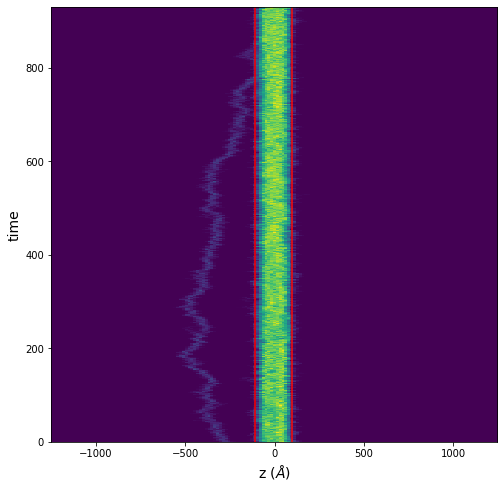

In [36]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(rho_z, aspect='auto', extent=[z.min(), z.max(),  og_rho.shape[0], 0])
ax.invert_yaxis()
ax.set_ylabel("time",  fontsize=14)
ax.set_xlabel("z ($\AA$)", fontsize=14)
ax.axvline(intf[0], color='red')
ax.axvline(intf[1], color='red')

In [67]:
# D4
rgD4 = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/CPEB4_D4').rg()
rg12D = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/12D_CPEB4_D4').rg()

#WT
rgWT = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/CPEB4').rg()
rg7D = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/7D_CPEB4').rg()

d4err = analysis.Analysis(oliba_wd=None).block_error(rgD4)
d12err = analysis.Analysis(oliba_wd=None).block_error(rg12D)
wterr = analysis.Analysis(oliba_wd=None).block_error(rgWT)
d7err = analysis.Analysis(oliba_wd=None).block_error(rg7D)

> Run Completed at 38.98% for CPEB4_D4. Ran 389850000 steps for a total of 77971 frames 
> Taking frames every 2 for a total of 10000 to avoid strong correlations
> Run Completed at 21.91% for 12D_CPEB4_D4. Ran 219050000 steps for a total of 43811 frames 
> Taking frames every 2 for a total of 10000 to avoid strong correlations
> Run Completed at 31.77% for CPEB4. Ran 317695000 steps for a total of 63540 frames 
> Taking frames every 2 for a total of 10000 to avoid strong correlations
> Run Completed at 14.38% for 7D_CPEB4. Ran 143805000 steps for a total of 28762 frames 
> Taking frames every 2 for a total of 10000 to avoid strong correlations


In [75]:
rgWT2 = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/0.8/SingleChain/WT').rg()
rgD42 = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/0.8/SingleChain/D4').rg()
rgWT_err2 = analysis.Analysis(oliba_wd=None).block_error(rgWT2)
rgD4_err2 = analysis.Analysis(oliba_wd=None).block_error(rgD42)

> Run Completed at 96.34% for CPEB4. Ran 963450000 steps for a total of 19270 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations
> Run Completed at 96.00% for CPEB4_D4. Ran 960050000 steps for a total of 19202 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations


(5,) (5,) (5,)


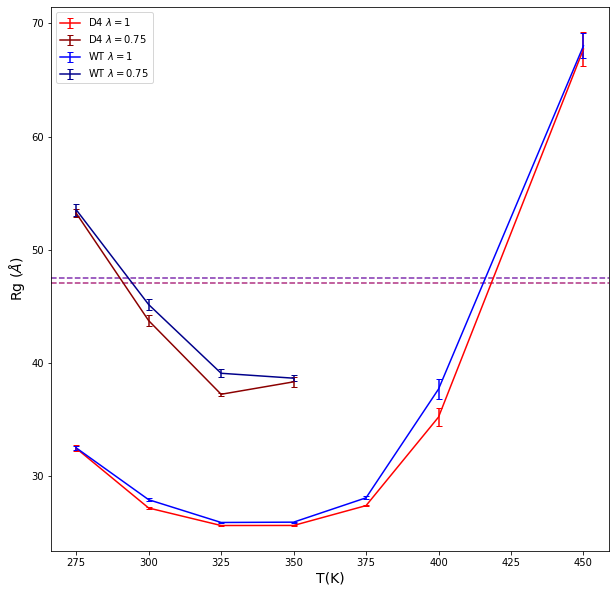

In [117]:
rge4_th = 5.5*448**0.5/6**0.5
rgwt_th = 5.5*440**0.5/6**0.5

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("T(K)", fontsize=14)
ax.set_ylabel("Rg ($\AA$)", fontsize=14)

ax.errorbar(temperatures, rgD4.mean(axis=1), yerr=d4err, color='red', capsize=3, label='D4 $\lambda=1$')
ax.errorbar(temperatures2[1:], rgD42.mean(axis=1)[1:], yerr=rgD4_err2[1:], markersize=3, color='darkred', linestyle='-', label='D4 $\lambda=0.75$', capsize=3)
ax.errorbar(temperatures, rgWT.mean(axis=1), yerr=wterr, color='blue', capsize=3, label='WT $\lambda=1$')
ax.axhline(rge4_th, ls='--', color='red', alpha=0.5)
ax.axhline(rgwt_th, ls='--', color='blue', alpha=0.5)
ax.legend(fontsize=14)

ax.axhline(theta_rg_WT, ls='--', color='b', alpha=0.5)
ax.axhline(theta_rg_D4, ls='--', color='r', alpha=0.5)
print(temperatures2.shape, rgD42.mean(axis=1).shape, rgD4_err2.shape)
ax.errorbar(temperatures2[1:], rgWT2.mean(axis=1)[1:], yerr=rgWT_err2[1:], markersize=1,  color='darkblue', linestyle='-',  label='WT $\lambda=0.75$', capsize=3)
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("T(K)", fontsize=14)
ax.set_ylabel("Rg ($\AA$)", fontsize=14)
ax.errorbar(temperatures, rg12D.mean(axis=1), yerr=d12err, color='orange', capsize=3, label='12D')
ax.errorbar(temperatures, rgD4.mean(axis=1), yerr=d4err, color='red', capsize=3, label='D4')
ax.axhline(rgwt_th, ls='--', color='red', alpha=0.5)
ax.legend(fontsize=14)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("T(K)", fontsize=14)
ax.set_ylabel("Rg ($\AA$)", fontsize=14)
ax.errorbar(temperatures, rgWT.mean(axis=1), yerr=d12err, color='blue', capsize=3, label='WT')
ax.errorbar(temperatures, rg7D.mean(axis=1), yerr=d4err, color='lightblue', capsize=3, label='7D')
ax.axhline(rgwt_th, ls='--', color='blue', alpha=0.5)
ax.legend(fontsize=14)

> Run Completed at 100.00% for CPEB4_D4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations


/home/adria/scripts/lammps/lammps/analysis.py:927: RuntimeWarning: invalid value encountered in power
  def rectilinear_diametres(x, A2, Tc_rd, rho_c):


> Run Completed at 100.00% for CPEB4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations


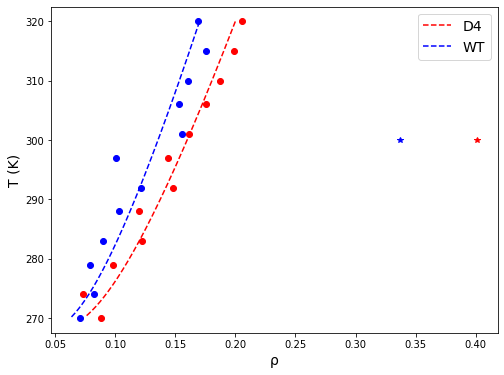

In [116]:
plt.figure(figsize=(8,6))
plt.xlabel("ρ", fontsize=14)
plt.ylabel("T (K)", fontsize=14)

pdD4 = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/0.75/D4', equil_frames=100)
pds = pdD4.phase_diagram()
rho_c = pds[1].mean(axis=1)
rho_d = pds[0].mean(axis=1)
e_rho_c = analysis.Analysis(oliba_wd=None).block_error(pds[1])
e_rho_d = analysis.Analysis(oliba_wd=None).block_error(pds[1])


fit, critical_point = pdD4.find_Tc_from_diagram(rho_c=rho_c, rho_d=rho_d, temperatures=pdD4.temperatures)

plt.plot(pds[1].mean(axis=1), pdD4.temperatures, 'ro')
plt.plot(fit[0,:-100],fit[1,:-100], '--r', label='D4')


pdWT = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/0.75/WT', equil_frames=100)
pds = pdWT.phase_diagram()
rho_c = pds[1].mean(axis=1)
rho_d = pds[0].mean(axis=1)
fit, critical_point = pdWT.find_Tc_from_diagram(rho_c=rho_c, rho_d=rho_d, temperatures=pdWT.temperatures)

plt.plot(pds[1].mean(axis=1), pdD4.temperatures, 'bo')
plt.plot(fit[0,:-100],fit[1, :-100], '--b', label='WT')

plt.plot(pwts[1].mean(axis=1)[0], 300, 'bo', marker='*', )
plt.plot(pd4s[1].mean(axis=1)[0], 300, 'ro', marker='*')

plt.legend(fontsize=14)

In [99]:
pdWT1 = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/CPEB4x50', equil_frames=100)
pdD41 = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/CPEB4_D4x50', equil_frames=100)
pd4s = pdD41.phase_diagram()
pwts = pdWT1.phase_diagram()
temps = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/CPEB4x50', equil_frames=100).temperatures

> Run Completed at 100.00% for CPEB4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations
> Interface fit failed for positive z, returning 0 (no interface) !!!
> Interface fit failed for negative z, returning 0 (no interface) !!!


/home/adria/scripts/lammps/lammps/analysis.py:913: RuntimeWarning: invalid value encountered in true_divide
  condensed_densities.append(mass_condensed / volume_condensed)


> Interface fit failed for positive z, returning 0 (no interface) !!!
> Interface fit failed for negative z, returning 0 (no interface) !!!
> Interface fit failed for negative z, returning 0 (no interface) !!!
> Interface fit failed for negative z, returning 0 (no interface) !!!
> Run Completed at 100.00% for CPEB4. Ran 20000 steps for a total of 2 frames 
> Taking frames every 1 for a total of 10000 to avoid strong correlations


array([0.33718457, 0.21714646, 0.15142137, 0.15539237])

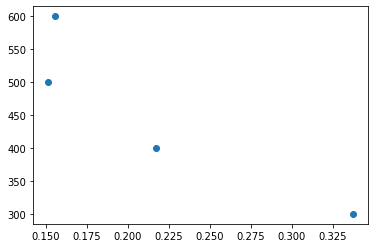

In [114]:
plt.plot(pwts[1].mean(axis=1),temps,'o')
pd4s[1].mean(axis=1)
pwts[1].mean(axis=1)